# Computer Vision - 101

In this notebook, we will study some of the core concepts behind computer vision. The tools we're going to use are based on Opencv-library. 

The first half of this study is about basics on image processing. 

In [1]:
#Loading the tools
import cv2 as cv
import os
import matplotlib.pyplot as plt

print("Libraries ok!")

Libraries ok!


## Basics on digital images
As you may know, images are an matrix of pixels. Each pixel value represents the intensity in a scale 0-263 for a 8-bit image.
RGB, colored, images are essencialy three matrices, each for a color layer,i.e one matrix for Red, one for Green, one for Blue. 

Depending on the tool used, the order of the matrices may be interpreted as BGR, i.e. the first channel is the Blue, then comes the Green and later the Red. This is the case for Opencv. What this means is that in some cases the channel orders may have to be treated. This is particularly true when we try to plot an RGB image using the method `plt.imshow`, but the image was loaded with openCV using `cv2.imread` . 

Finally, it is commom in image processing, treating the images as a single layer, i.e. gray image, for that, there is a simple way to merge all three channels (RGB) as a single mono-chromatic layer `cv2.cvtColor()` is a versityle method for converting either BGR-images into gray-scale images or  into RGB-images.

In [22]:
#Treating the file path
cwd = os.getcwd()
my_image = "images\lenna.png"
image_path = os.path.join(cwd,my_image)
print("Image path is: " + image_path)

#Loading the image in the program
if os.path.isfile(image_path):
    image = cv.imread(image_path)
#Converting from BGR to grayscale
    image_gray = cv.cvtColor(image,cv.COLOR_BGR2GRAY)
    image_rgb = cv.cvtColor(image,cv.COLOR_BGR2RGB)
    print("Image loaded!")
else:
    print("File does not exist")



Image path is: C:\Users\hugo.medeiros\OneDrive\Academico\Udacity\computer-vision-tutorial\images\lenna.png
Image loaded!


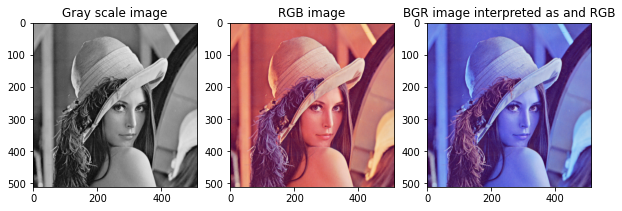

In [31]:
#Displaying the image
plt.figure(figsize=(10,10))
plt.subplot(131),plt.imshow(image_gray,cmap='gray'),plt.title("Gray scale image")
plt.subplot(132),plt.imshow(image_rgb),plt.title("RGB image")
plt.subplot(133),plt.imshow(image),plt.title("BGR image interpreted as and RGB")
plt.show()

As you may see in the third image, when the channel order is not treated, the image is still colorfull, however its colors are particularly odd.

# Image Convolution/Image Correlation - Kernel

The main fundamental operations applied to images are either **correlation or convolution**. Both operations consist of sliding a smaller matrix across the image to be transformed. As the matrix, also known as **Kernel**, slides trought, a new pixel is computed based on some matrix multiplication. 

![Correlation vs Convolution](images/correlation-vs-convolution.png)


Deppeding on the kernel one is using, for example a simetric kernel such as a gaussian, flipping the kernel won't cause any difference. However, when dealing with assymetric kernel operations, as in *image derivatives*, this flipping effect matters.